In [1]:
import sys

sys.path.append('.')

import model

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statistics

This time, run the model with no contact tracing at all.

In [3]:
N = 2000
K = 4
p_star = 0.256

def watts_strogatz_case_p_star(**kwargs):

    g = nx.watts_strogatz_graph(N, K, p_star)
    
    g.graph['p'] = p_star
    g.graph['K'] = K
    
    return g, kwargs

In [4]:
## Population parameters:
base_params = {
    # Node parameter
    'A' : 0.2, # This is A* from the second study.
    
    # Edge parameter
    'W' : .5, # probability of edge activation; 2/K
    'C' : 1.0, ## all edges can be traced.
    
    ## Disease parameters

    'beta_hat' : .4, # probability of transmission upon contact
    'alpha' : .25, # probability of exposed becoming infectious
    'gamma' : .1, # probability of infectious becoming recovered
    'zeta' : .1, # probability of infectious becoming symptomatic

    ## Contact tracing parameters

    'limit' : 10, # number of time steps the contact tracing system remembers
}

In [5]:
conditions = {
    'q-0.000' : {'C' : model.q_knockout(0.0), 'q' : 0.0},
    'q-0.100' : {'C' : model.q_knockout(0.1), 'q' : 0.1},
    'q-0.200' : {'C' : model.q_knockout(0.2), 'q' : 0.2},
    'q-0.300' : {'C' : model.q_knockout(0.3), 'q' : 0.3},
    'q-0.400' : {'C' : model.q_knockout(0.4), 'q' : 0.4},
    'q-0.500' : {'C' : model.q_knockout(0.5), 'q' : 0.5},
    'q-0.600' : {'C' : model.q_knockout(0.6), 'q' : 0.6},
    'q-0.700' : {'C' : model.q_knockout(0.7), 'q' : 0.7},
    'q-0.800' : {'C' : model.q_knockout(0.8), 'q' : 0.8},
    'q-0.900' : {'C' : model.q_knockout(0.9), 'q' : 0.9},
    'q-1.000' : {'C' : model.q_knockout(1.0), 'q' : 1.0},
}

In [6]:
runs = 100

results = model.experiment(
    watts_strogatz_case_p_star,
    base_params,
    conditions,
    runs)

q-0.000
Trial 0
Trial 3 hits time step 100
Trial 3 hits time step 200
Trial 3 hits time step 300
Trial 5 hits time step 100
Trial 5 hits time step 200
Trial 8 hits time step 100
Trial 8 hits time step 200
Trial 12 hits time step 100
Trial 12 hits time step 200
Trial 14 hits time step 100
Trial 14 hits time step 200
Trial 17 hits time step 100
Trial 21 hits time step 100
Trial 22 hits time step 100
Trial 22 hits time step 200
Trial 26 hits time step 100
Trial 26 hits time step 200
Trial 26 hits time step 300
Trial 28 hits time step 100
Trial 28 hits time step 200
Trial 29 hits time step 100
Trial 29 hits time step 200
Trial 32 hits time step 100
Trial 32 hits time step 200
Trial 34 hits time step 100
Trial 34 hits time step 200
Trial 35 hits time step 100
Trial 35 hits time step 200
Trial 36 hits time step 100
Trial 36 hits time step 200
Trial 36 hits time step 300
Trial 39 hits time step 100
Trial 39 hits time step 200
Trial 44 hits time step 100
Trial 44 hits time step 200
Trial 45 hi

Trial 50 hits time step 100
Trial 50 hits time step 200
Trial 51 hits time step 100
Trial 51 hits time step 200
Trial 56 hits time step 100
Trial 56 hits time step 200
Trial 58 hits time step 100
Trial 58 hits time step 200
Trial 58 hits time step 300
Trial 59 hits time step 100
Trial 59 hits time step 200
Trial 63 hits time step 100
Trial 63 hits time step 200
Trial 63 hits time step 300
Trial 64 hits time step 100
Trial 64 hits time step 200
Trial 65 hits time step 100
Trial 65 hits time step 200
Trial 68 hits time step 100
Trial 68 hits time step 200
Trial 71 hits time step 100
Trial 71 hits time step 200
Trial 72 hits time step 100
Trial 72 hits time step 200
Trial 72 hits time step 300
Trial 74 hits time step 100
Trial 74 hits time step 200
Trial 75 hits time step 100
Trial 75 hits time step 200
Trial 78 hits time step 100
Trial 78 hits time step 200
Trial 80 hits time step 100
Trial 80 hits time step 200
Trial 81 hits time step 100
Trial 81 hits time step 200
Trial 86 hits time s

Trial 72 hits time step 100
Trial 72 hits time step 200
Trial 78 hits time step 100
Trial 78 hits time step 200
Trial 78 hits time step 300
Trial 80 hits time step 100
Trial 80 hits time step 200
Trial 82 hits time step 100
Trial 82 hits time step 200
Trial 82 hits time step 300
Trial 86 hits time step 100
Trial 86 hits time step 200
Trial 86 hits time step 300
Trial 88 hits time step 100
Trial 88 hits time step 200
Trial 89 hits time step 100
Trial 89 hits time step 200
Trial 90 hits time step 100
Trial 90 hits time step 200
Trial 93 hits time step 100
Trial 93 hits time step 200
Trial 97 hits time step 100
Trial 97 hits time step 200
Trial 97 hits time step 300
Trial 99 hits time step 100
Trial 99 hits time step 200
q-0.700
Trial 0
Trial 0 hits time step 100
Trial 0 hits time step 200
Trial 1 hits time step 100
Trial 1 hits time step 200
Trial 1 hits time step 300
Trial 5 hits time step 100
Trial 5 hits time step 200
Trial 7 hits time step 100
Trial 7 hits time step 200
Trial 13 hits

q-1.000
Trial 0
Trial 1 hits time step 100
Trial 1 hits time step 200
Trial 4 hits time step 100
Trial 4 hits time step 200
Trial 5 hits time step 100
Trial 5 hits time step 200
Trial 6 hits time step 100
Trial 6 hits time step 200
Trial 9 hits time step 100
Trial 9 hits time step 200
Trial 12 hits time step 100
Trial 12 hits time step 200
Trial 14 hits time step 100
Trial 16 hits time step 100
Trial 16 hits time step 200
Trial 19 hits time step 100
Trial 19 hits time step 200
Trial 21 hits time step 100
Trial 21 hits time step 200
Trial 21 hits time step 300
Trial 25 hits time step 100
Trial 25 hits time step 200
Trial 26 hits time step 100
Trial 26 hits time step 200
Trial 27 hits time step 100
Trial 27 hits time step 200
Trial 31 hits time step 100
Trial 31 hits time step 200
Trial 32 hits time step 100
Trial 32 hits time step 200
Trial 32 hits time step 300
Trial 34 hits time step 100
Trial 36 hits time step 100
Trial 36 hits time step 200
Trial 39 hits time step 100
Trial 39 hits 

In [7]:
import pickle

In [8]:
results['q-0.000'][0][2]

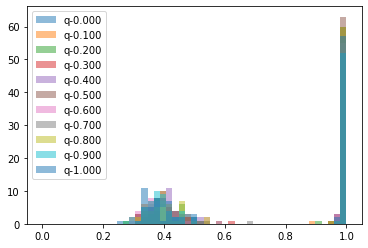

In [9]:
g = results['q-0.000'][0][2]
bins = np.linspace(0, 1, 50)

for case in results:
    plt.hist(
        [len(model.susceptible(r[2])) / N
         for r
         in results[case]],
        bins,
        alpha=.5,
        label=case)
    
plt.legend()

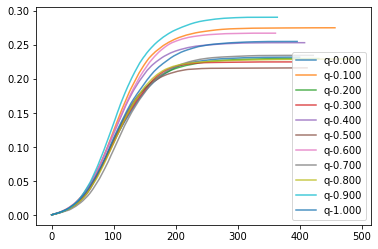

In [10]:
g = results['q-0.000'][0][2]
bins = np.linspace(0, len(g.nodes()), 50)

for case in results:
    plt.plot(
        model.average_over_time(results[case], infected=True) / N,
        alpha=.8,
        label=case)
    
plt.legend()

In [11]:
def case_mean_infected(records):
    return N - statistics.mean([
        len(model.susceptible(r[2]))
        for r
        in records
    ])

epidemic_size = {
    results[case][0][1]['q'] : case_mean_infected(results[case]) / N
    for case
    in results
}

In [12]:
epidemic_size

{0.0: 0.23178499999999996,
 0.1: 0.27480499999999997,
 0.2: 0.229725,
 0.3: 0.22475499999999998,
 0.4: 0.25295000000000006,
 0.5: 0.21608500000000003,
 0.6: 0.26688,
 0.7: 0.23434000000000002,
 0.8: 0.22913,
 0.9: 0.290235,
 1.0: 0.254745}

Text(0, 0.5, 'average final infected ratio')

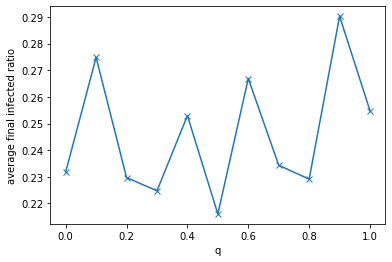

In [13]:
ax = plt.plot(list(epidemic_size.keys()),
              list(epidemic_size.values()),
              'x-'
        )

#plt.xscale('log')
plt.xlabel('q')
plt.ylabel('average final infected ratio')

In [14]:
def data_from_result(results, case):
    return [(r[1],
             {
                 "case" : case,
                 "q" : r[1]['q'],
                  "time" : r[0],
                  "s_final" : r[4][-1]
             }) 
            for r
            in results[case]]

def data_from_all_results(results):
    return [r for case in results for r in data_from_result(results, case)]

data = data_from_all_results(results)

data

[({'A': 0.2,
   'W': 0.5,
   'C': <function model.q_knockout.<locals>.knockout(g, e)>,
   'beta_hat': 0.4,
   'alpha': 0.25,
   'gamma': 0.1,
   'zeta': 0.1,
   'limit': 10,
   'q': 0.0},
  {'case': 'q-0.000', 'q': 0.0, 'time': 1, 's_final': 1999}),
 ({'A': 0.2,
   'W': 0.5,
   'C': <function model.q_knockout.<locals>.knockout(g, e)>,
   'beta_hat': 0.4,
   'alpha': 0.25,
   'gamma': 0.1,
   'zeta': 0.1,
   'limit': 10,
   'q': 0.0},
  {'case': 'q-0.000', 'q': 0.0, 'time': 6, 's_final': 1998}),
 ({'A': 0.2,
   'W': 0.5,
   'C': <function model.q_knockout.<locals>.knockout(g, e)>,
   'beta_hat': 0.4,
   'alpha': 0.25,
   'gamma': 0.1,
   'zeta': 0.1,
   'limit': 10,
   'q': 0.0},
  {'case': 'q-0.000', 'q': 0.0, 'time': 9, 's_final': 1996}),
 ({'A': 0.2,
   'W': 0.5,
   'C': <function model.q_knockout.<locals>.knockout(g, e)>,
   'beta_hat': 0.4,
   'alpha': 0.25,
   'gamma': 0.1,
   'zeta': 0.1,
   'limit': 10,
   'q': 0.0},
  {'case': 'q-0.000', 'q': 0.0, 'time': 367, 's_final': 728}),

In [15]:
data_x = [r[1]['q'] for r in data]
data_y = [(N - r[1]['s_final']) / N for r in data]

df = pd.DataFrame(data = {"q" : data_x, "s_final" : data_y})

In [16]:
df['log-q'] = np.log1p(df['q'])

In [17]:
df['log-q']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1095    0.693147
1096    0.693147
1097    0.693147
1098    0.693147
1099    0.693147
Name: log-q, Length: 1100, dtype: float64

[Text(0, 0.5, 'average final infected ratio'), Text(0.5, 0, 'q rate')]

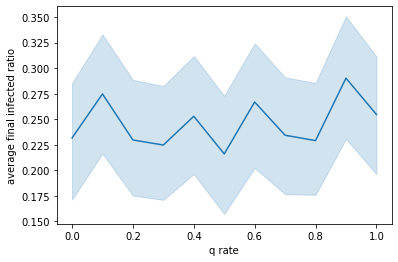

In [18]:
splot = sns.lineplot(x='q', y='s_final', data=df)
splot.set(#xscale="log",
          xlabel='q rate',
          ylabel='average final infected ratio')

## Finding the inflection point

Trying to find the inflection point. (What if there isn't one?)

In [19]:
x = np.array(list(epidemic_size.keys()))

In [20]:
y = np.array(list(epidemic_size.values()))

In [21]:
df1 = np.gradient(y,
            x,
            edge_order = 1)

In [22]:
np.gradient(df1, x, edge_order = 1)

array([-4.405   , -3.40225 ,  0.632125,  1.0345  , -0.232375,  0.673125,
       -1.292   ,  0.941   ,  1.584125, -3.171875, -4.82975 ])

In [23]:
x[np.argsort(df1)]

array([1. , 0.2, 0.7, 0.4, 0.1, 0.5, 0.6, 0.3, 0.9, 0.8, 0. ])

In [24]:
model.inflection_point(np.array(list(epidemic_size.keys())),
                  np.array(list(epidemic_size.values())))

(1.0, 0.254745)

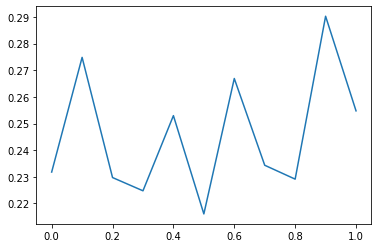

In [25]:
plt.plot(x, y)


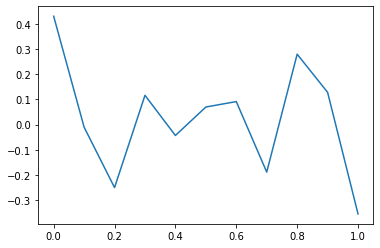

In [26]:
plt.plot(x, df1)
